In [4]:
# Importing Standard Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing sklearn Libraries
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# inputs in the two-dimensional array X
X = np.arange(1, 25).reshape(12, 2)

# outputs in the one-dimensional array y
y = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [6]:
print(X)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]
 [21 22]
 [23 24]]


In [7]:
print(y)

[0 1 1 0 1 0 0 1 1 0 1 0]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4, random_state=4)

In [9]:
X_train

array([[17, 18],
       [ 5,  6],
       [23, 24],
       [ 1,  2],
       [ 3,  4],
       [11, 12],
       [15, 16],
       [21, 22]])

In [10]:
X_test

array([[ 7,  8],
       [ 9, 10],
       [13, 14],
       [19, 20]])

In [11]:
y_train

array([1, 1, 0, 0, 1, 0, 1, 1])

In [12]:
y_test

array([0, 1, 0, 0])

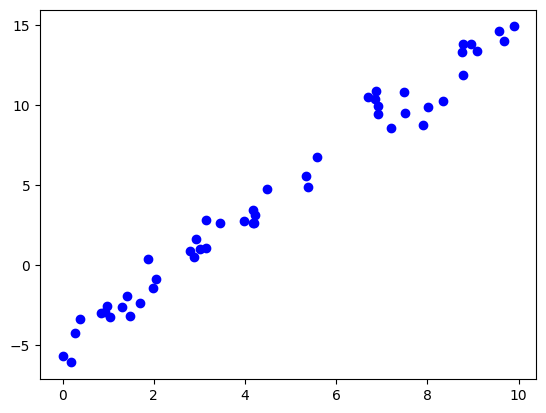

In [13]:
# Generating Sample data

rng = np.random.RandomState(1)              # instantiate random number generator
x = 10 * rng.rand(50)                       # generate 50 random numbers from uniform distribution
y = 2 * x - 5 + rng.randn(50)               # use 50 random numbers from normal distribution as noise
plt.scatter(x, y, c='b');

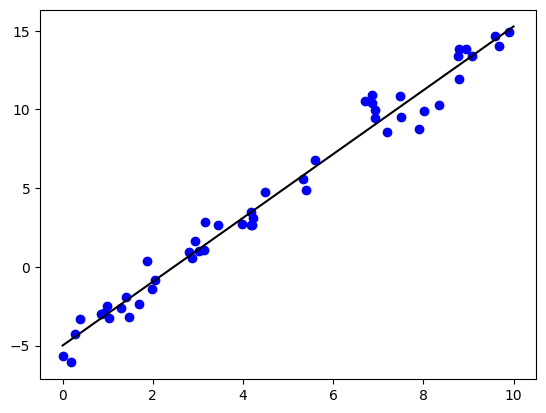

In [14]:
model = LinearRegression(fit_intercept=True)                   # instantiate LinearRegression

model.fit(x[:, np.newaxis], y)                                 # fit the model on data using 'x' as column vector

xfit = np.linspace(0, 10, 1000)                                # create 1000 points between 0 and 10
yfit = model.predict(xfit[:, np.newaxis])                      # predict the values for dependent variable

plt.scatter(x, y, c='b')
plt.plot(xfit, yfit, 'k');

In [15]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))   # using a pipeline to string these operations together

In [16]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

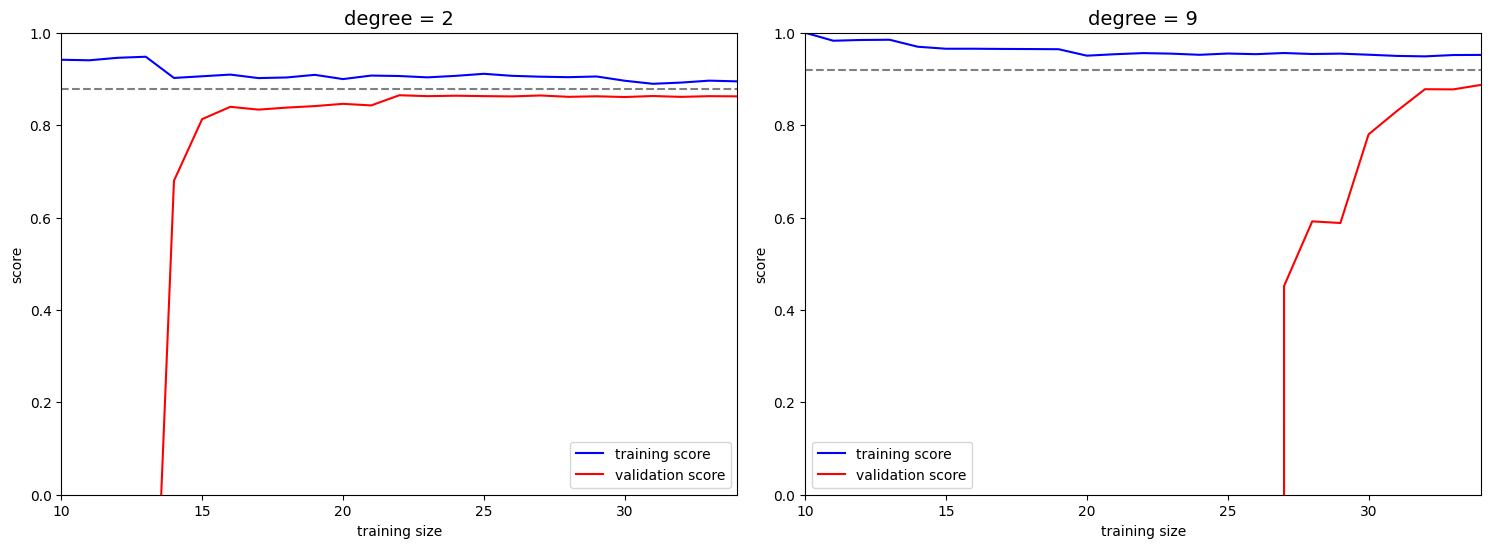

In [17]:
# learning curve for generated dataset with a second-order polynomial model and a ninth-order polynomial

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [18]:
# Read data
auto = pd.read_csv("auto-mpg.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'auto-mpg.csv'

In [ ]:
auto.head()

In [ ]:
# print names of the features
print(auto.columns)

In [ ]:
# generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
auto.describe()

In [ ]:
# summary of the DataFrame
auto.info()

In [ ]:
auto.isna().sum()

In [ ]:
# Pairplot
plt.style.use('ggplot')
sns.pairplot(auto)

In [ ]:
# Heatmap
#plt.figure(figsize=(8, 8))
#sns.heatmap(auto.corr(), annot=True, linewidth=0.5, center=0)
#plt.show()

numeric_auto = auto.select_dtypes(include=['number'])

corr_matrix = numeric_auto.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, center = 0, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
auto.head()

In [ ]:
auto.dtypes

In [ ]:
# Unique values in horsepower column
auto['horsepower'].unique()

In [ ]:
# Removing '?' from horsepower column
auto = auto[auto['horsepower'] != '?']
auto['horsepower'].unique()

In [ ]:
# Converting horsepower column datatype from string to float
auto['horsepower'] = auto['horsepower'].astype(float)
auto.dtypes

In [ ]:
# Pridiction features
X = auto[['displacement', 'horsepower', 'acceleration', 'model year', 'origin']]
# Target feature
y = auto['mpg']
X.head()

In [ ]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)
X_train.head()

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
pred = lr.predict(X_test)
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))
print('Coefficient of Determination:', r2_score(y_test, pred))

In [ ]:
pred = lr.predict(X_test)
print('Predicted fuel consumption(mpg):', pred[2])
print('Actual fuel consumption(mpg):', y_test.values[2])

In [ ]:
# Note that the dataset is already downloaded in the set-up stage at the start of the notebook
# Convert it into a pandas dataframe:

df = pd.read_csv('Real_estate.csv')

# Taking only the selected two attributes from the dataset
df_binary = df[['X2 house age', 'Y house price of unit area']]

df.head()

In [ ]:
n_samples, n_features = 15, 10
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

rdg = linear_model.Ridge(alpha = 0.5)                  # instantiate Ridge regressor
rdg.fit(X, y)
rdg.score(X,y)

In [ ]:
# uses coordinate descent as the algorithm to fit the coefficients

Lreg = linear_model.Lasso(alpha = 0.5)
Lreg.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

In [ ]:
Lreg.predict([[0,1]])

In [ ]:
Lreg.coef_

In [ ]:
Lreg.intercept_

In [ ]:
Lreg.n_iter_

In [ ]:
# uses coordinate descent as the algorithm to fit the coefficients

ENreg = linear_model.ElasticNet(alpha = 0.5,random_state = 0)
ENreg.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

In [ ]:
ENreg.predict([[0,1]])

In [ ]:
#weight vectors
ENreg.coef_

In [ ]:
ENreg.intercept_
ENreg.n_iter_

In [ ]:
Lreg = linear_model.Lasso(alpha = 0.25)
Lreg.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
Lreg.coef_  #weight vectors

In [ ]:
Lreg = linear_model.Lasso(alpha = 0.5)
Lreg.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
Lreg.coef_  #weight vectors

In [ ]:
Lreg = linear_model.Lasso(alpha = 0.75)
Lreg.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
Lreg.coef_  #weight vectors